In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("bank_churn_dataset.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop unnecessary columns

In [3]:
df.drop('RowNumber', axis='columns', inplace=True)
df.drop('CustomerId', axis='columns', inplace=True)
df.drop('Surname', axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.shape

(10000, 11)

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check unique values

In [7]:
def unique_values():
    for col in df:
        print(f"{col}: {df[col].unique()}")


In [8]:
unique_values()

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

### One hot encoding

In [9]:
df = pd.get_dummies(data=df, columns=['Geography', 'NumOfProducts'], dtype=int, drop_first=True)

In [10]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_8276\2292856915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
C:\Users\Mehedi\AppData\Local\Temp\ipykernel_8276\2292856915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].

In [11]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,0,0,0


### Data Analysis

In [12]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

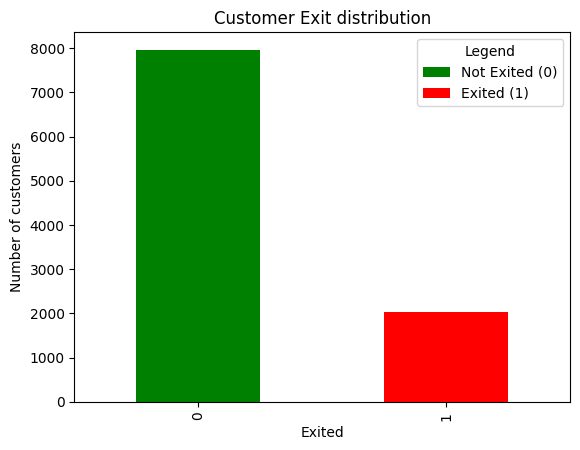

In [13]:
ax = df.Exited.value_counts().plot(kind='bar',x='Exited', y='Number of customers', color=['green', 'red'])
ax.set_xlabel('Exited')
ax.set_ylabel('Number of customers')
ax.set_title('Customer Exit distribution')
ax.legend(handles=ax.patches, labels=['Not Exited (0)', 'Exited (1)'], title='Legend')
plt.show()

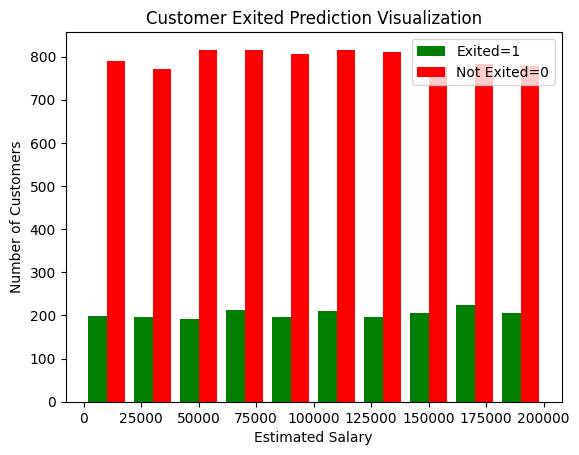

In [14]:
salary_churn_no = df[df.Exited==0].EstimatedSalary
salary_churn_yes = df[df.Exited==1].EstimatedSalary

plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Customer Exited Prediction Visualization')

plt.hist([salary_churn_yes, salary_churn_no], color=['green','red'], label=['Exited=1','Not Exited=0'])
plt.legend()

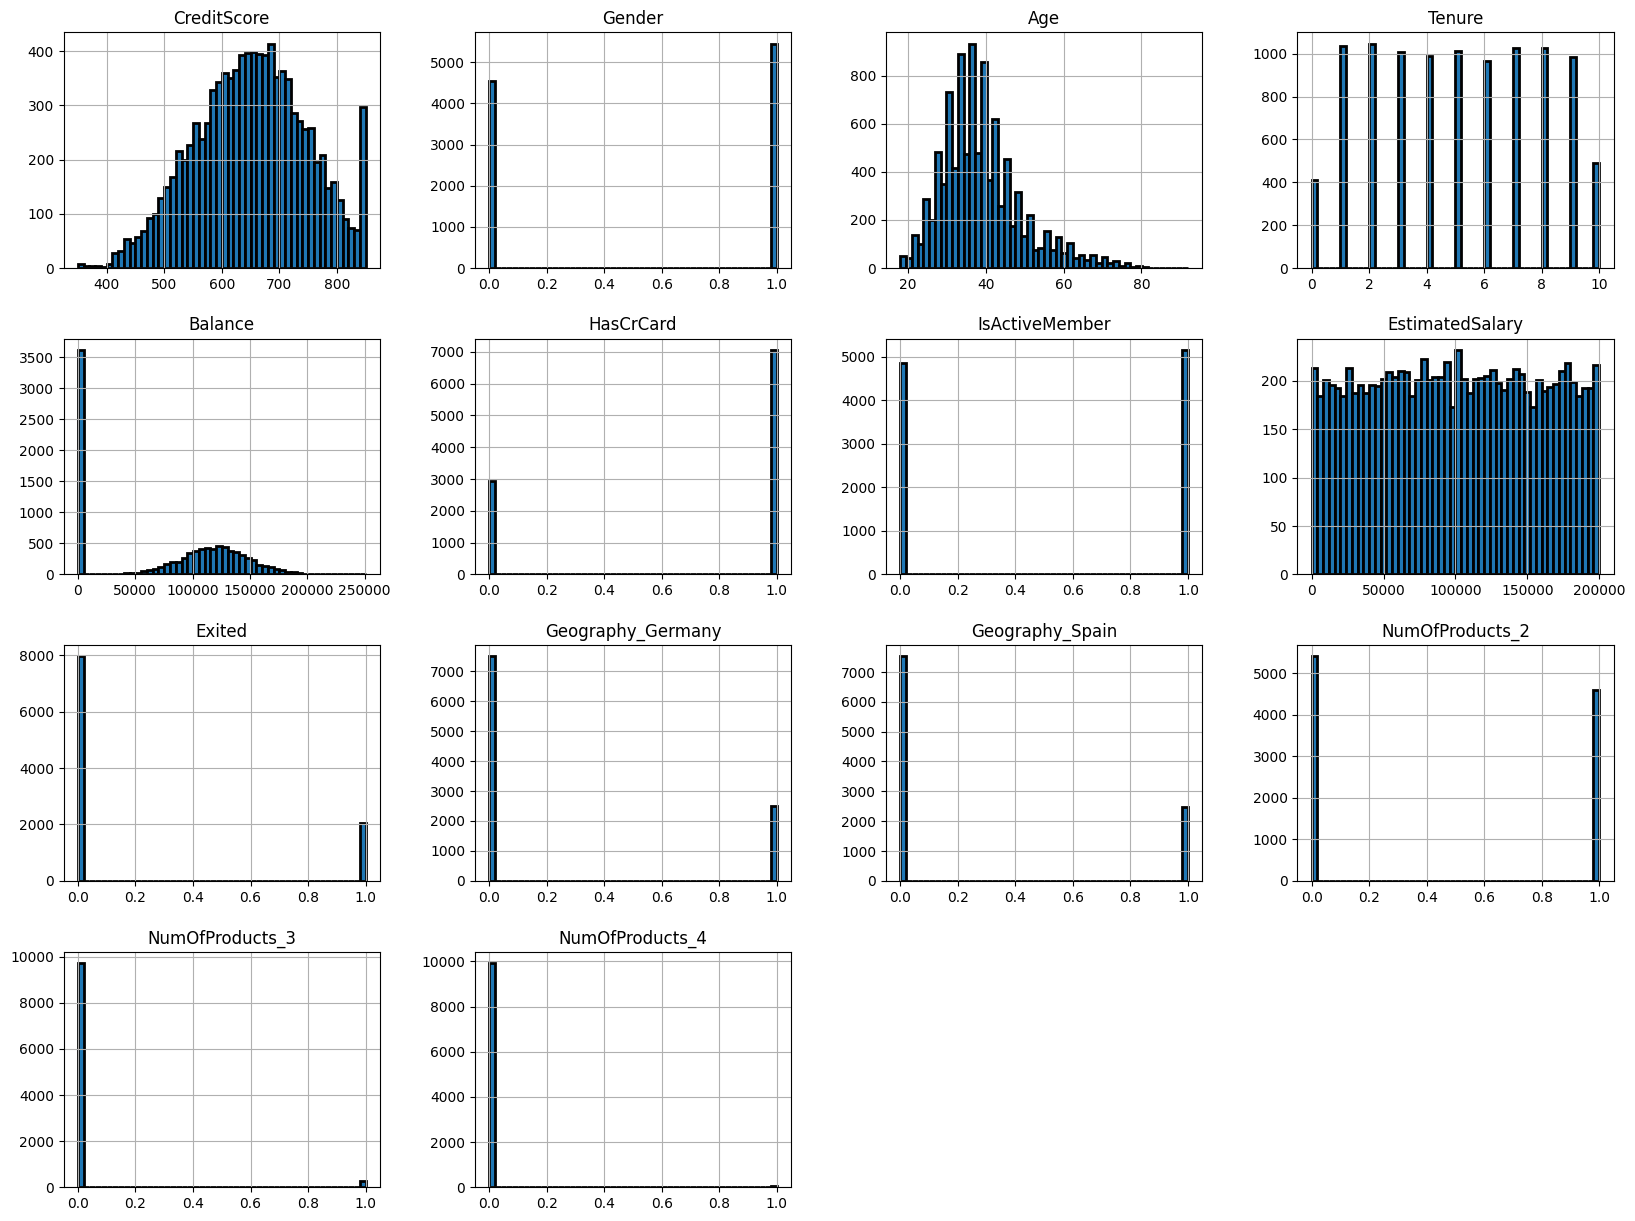

In [15]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

### Scaling

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,0,0,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [18]:
df[cols_to_scale].head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.562709
2,0.304,0.324324,0.8,0.636357,0.569654
3,0.698,0.283784,0.1,0.000000,0.469120
4,1.000,0.337838,0.2,0.500246,0.395400


### Train and Test Split

In [19]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [20]:
X_train.shape

(8000, 13)

In [21]:
X_test.shape

(2000, 13)

### SMOTE Oversampling

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(12740, 13)

### Convert Data to PyTorch Tensors

In [23]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [24]:
X_train_tensor = torch.FloatTensor(X_train_resampled.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_train_tensor = torch.FloatTensor(y_train_resampled.values)
y_test_tensor = torch.FloatTensor(y_test.values)

print(f"X_train shape: {X_train_tensor.shape}")
print(f"y_train shape: {y_train_tensor.shape}")

X_train shape: torch.Size([12740, 13])
y_train shape: torch.Size([12740])


### Custom Dataset

In [25]:
class ChurnDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
# Create dataset objects
train_dataset = ChurnDataset(X_train_tensor, y_train_tensor)
test_dataset = ChurnDataset(X_test_tensor, y_test_tensor)

# Create data loaders 
train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)

### Build ANN Model

In [26]:
# Check CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [27]:
# # Move model to GPU
# model = ChurnANN(input_size).to(device)
# print(f'Model is on: {next(model.parameters()).device}')

In [28]:
class ChurnANN(nn.Module):
    def __init__(self, input_size):
        super(ChurnANN, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, 7)   # Input Layer  
        self.fc2 = nn.Linear(7, 4)            # Hidden layer 1 
        self.fc3 = nn.Linear(4, 1)            # Hidden layer 2 (output layer)
        
        # Activation functions
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Prevent overfitting
        self.sigmoid = nn.Sigmoid()     # Binary classification
        
    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = self.sigmoid(self.fc3(x))
        
        return x 
    
# Initialize the model
input_size = X_train.shape[1]
model = ChurnANN(input_size).to(device)
print(model)
print(f'Model is on: {next(model.parameters()).device}')        

ChurnANN(
  (fc1): Linear(in_features=13, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (sigmoid): Sigmoid()
)
Model is on: cuda:0


In [29]:
# Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Adam optimizer (adaptive learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

Loss function: BCELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


### Train the Model

In [30]:
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        
        for X_batch, y_batch in train_loader:
            # Move the data to GPU
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            # Forward Pass
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            
            # Backward pass and optimization
            optimizer.zero_grad() # Clear previous gradients
            loss.backward()       # Calculate gradients
            optimizer.step()      # Update weights
            
            epoch_loss += loss.item()
            
        # Calculate average loss for this epoch
        avg_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_loss)
        
        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
            
    return loss_history
epochs = 300
loss_history = train_model(model, train_loader, criterion, optimizer, epochs)

Epoch [10/300], Loss: 0.5200
Epoch [20/300], Loss: 0.5051
Epoch [30/300], Loss: 0.5019
Epoch [40/300], Loss: 0.4982
Epoch [50/300], Loss: 0.4991
Epoch [60/300], Loss: 0.4928
Epoch [70/300], Loss: 0.4965
Epoch [80/300], Loss: 0.4988
Epoch [90/300], Loss: 0.4892
Epoch [100/300], Loss: 0.4906
Epoch [110/300], Loss: 0.4905
Epoch [120/300], Loss: 0.4881
Epoch [130/300], Loss: 0.4873
Epoch [140/300], Loss: 0.4870
Epoch [150/300], Loss: 0.4873
Epoch [160/300], Loss: 0.4905
Epoch [170/300], Loss: 0.4859
Epoch [180/300], Loss: 0.4880
Epoch [190/300], Loss: 0.4870
Epoch [200/300], Loss: 0.4889
Epoch [210/300], Loss: 0.4870
Epoch [220/300], Loss: 0.4908
Epoch [230/300], Loss: 0.4896
Epoch [240/300], Loss: 0.4830
Epoch [250/300], Loss: 0.4892
Epoch [260/300], Loss: 0.4916
Epoch [270/300], Loss: 0.4896
Epoch [280/300], Loss: 0.4854
Epoch [290/300], Loss: 0.4895
Epoch [300/300], Loss: 0.4844


### Plot Training Loss

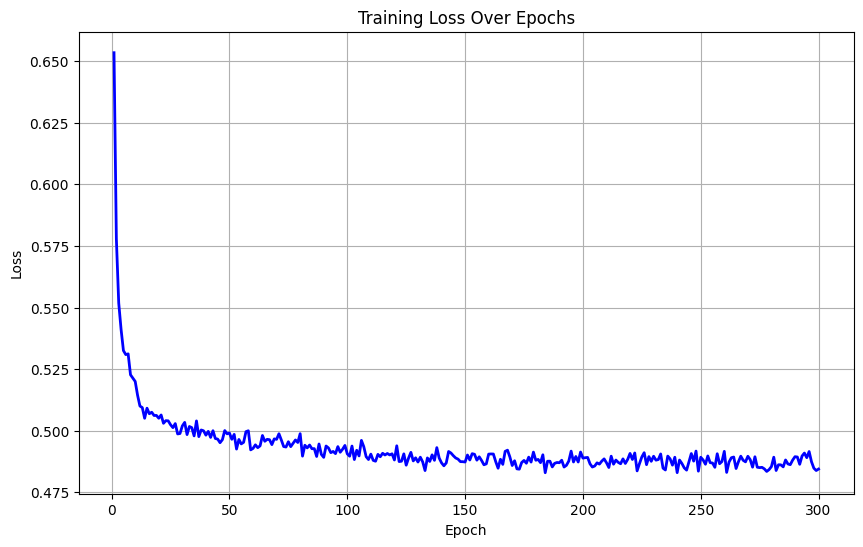

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), loss_history, 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

### Evaluate the Model

In [32]:
def evaluate_model(model, test_loader):
    model.eval()
    
    predictions = []
    truth_labels = []
    
    with torch.inference_mode():
        for X_batch, y_batch in test_loader:
            # Move the data to GPU
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            predicted = (outputs.squeeze() > 0.5).float() # convert prediction to 0/1
            
            predictions.extend(predicted.cpu().numpy())
            truth_labels.extend(y_batch.cpu().numpy()) 
            
    return np.array(predictions), np.array(truth_labels)

y_pred, y_truth = evaluate_model(model, test_loader)

In [33]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_truth, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_truth, y_pred))


Test Accuracy: 0.7790

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85      1593
         1.0       0.47      0.71      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



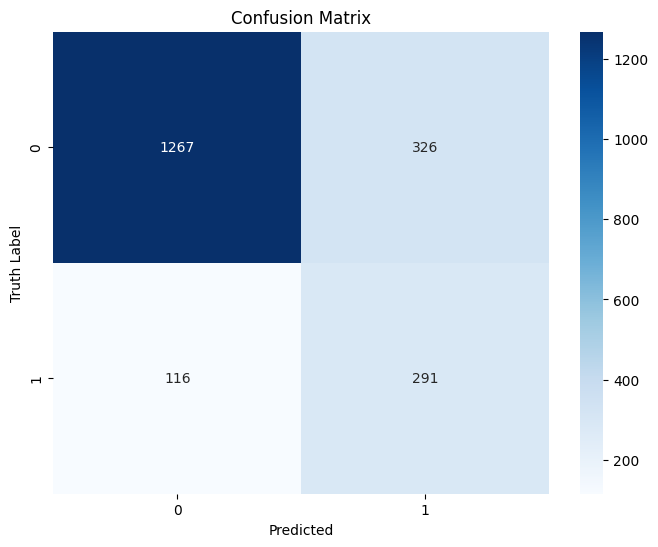

In [34]:
# Visualize Confusion Matrix
import seaborn as sns

cm = confusion_matrix(y_truth, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth Label')
plt.title('Confusion Matrix')
plt.show()